<a href="https://colab.research.google.com/github/RudraniGhosh24/nd009t-c1-intro-to-ml-templates/blob/master/project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
openxlab 0.0.38 requires setuptools~=60.2.0, but you have setuptools 69.5.1 which is incompatible.


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3109, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2902, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 245, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 444, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

### Setup Kaggle API Key

In [1]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json


#!mkdir -p /Users/rudranighosh/.kaggle

#!touch /Users/rudranighosh/.kaggle/kaggle.json
#!chmod 600 /Users/rudranighosh/.kaggle/kaggle.json

In [2]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "rudranighosh"
kaggle_key = "ea1281208e2c2328a233bf1494251787"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [3]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [4]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [5]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later

train = pd.read_csv("/content/train.csv", parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

print(train.describe())


                            datetime        season       holiday  \
count                          10886  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968      2.506614      0.028569   
min              2011-01-01 00:00:00      1.000000      0.000000   
25%              2011-07-02 07:15:00      2.000000      0.000000   
50%              2012-01-01 20:30:00      3.000000      0.000000   
75%              2012-07-01 12:45:00      4.000000      0.000000   
max              2012-12-19 23:00:00      4.000000      1.000000   
std                              NaN      1.116174      0.166599   

         workingday       weather         temp         atemp      humidity  \
count  10886.000000  10886.000000  10886.00000  10886.000000  10886.000000   
mean       0.680875      1.418427     20.23086     23.655084     61.886460   
min        0.000000      1.000000      0.82000      0.760000      0.000000   
25%        0.000000      1.000000     13.94000     16.665000     47.000000 

In [7]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("/content/test.csv", parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
# Same thing as train and test dataset

submission = pd.DataFrame()

print(submission.head())

Empty DataFrame
Columns: []
Index: []


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [9]:
from autogluon.tabular import TabularPredictor

label = 'count'

time_limit = 600

metric = 'root_mean_squared_error'

preset = 'best_quality'

train_filtered = train.drop(columns=['casual', 'registered'])

predictor = TabularPredictor(label=label, eval_metric=metric)
predictor.fit(train_data=train_filtered, time_limit=time_limit, presets=preset)


No path specified. Models will be saved in: "AutogluonModels/ag-20240427_073200"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240427_073200/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 205 seconds

### Review AutoGluon's training run with ranking of models that did the best.

In [10]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.142311  root_mean_squared_error      26.838419  381.542166                0.000901           0.031850            3       True         11
1   RandomForestMSE_BAG_L2  -53.409565  root_mean_squared_error      21.698509  293.966630                0.660333          43.489041            2       True         10
2          LightGBM_BAG_L2  -55.169359  root_mean_squared_error      21.283397  279.198083                0.245221          28.720494            2       True          9
3        LightGBMXT_BAG_L2  -60.616457  root_mean_squared_error      25.931964  309.300782                4.893788          58.823192            2       True          8
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.087337    0.048532   

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -131.66587328192207,
  'WeightedEnsemble_L2': -84.12506123181602,
  'LightGBMXT_BAG_L2': -60.61645701795783,
  'LightGBM_BAG_L2': -55.169359

### Create predictions from test dataset

In [11]:
predictions = predictor.predict(test)

print(predictions.head())

0    23.521248
1    43.596310
2    46.600334
3    49.264832
4    51.579014
Name: count, dtype: float32


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [12]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.552971
std        89.900635
min         3.209156
25%        19.857466
50%        63.411839
75%       169.275665
max       364.243591
Name: count, dtype: float64

In [13]:
# How many negative values do we have?
negative_values = (predictions < 0).sum()
print("Number of negative values:", negative_values)

Number of negative values: 0


In [14]:
# Set them to zero
predictions = predictions.clip(lower=0)


### Set predictions to submission dataframe, save, and submit

In [16]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [19]:
submission["datetime"] = test["datetime"]

submission["count"] = predictions

submission.to_csv("submission.csv", index=False)



In [20]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 514kB/s]  
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [21]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2024-04-27 07:46:41  first raw submission  complete  1.80457      1.80457       
submission.csv  2024-04-27 07:45:11  first raw submission  error                                


#### Initial score of 1.80457

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

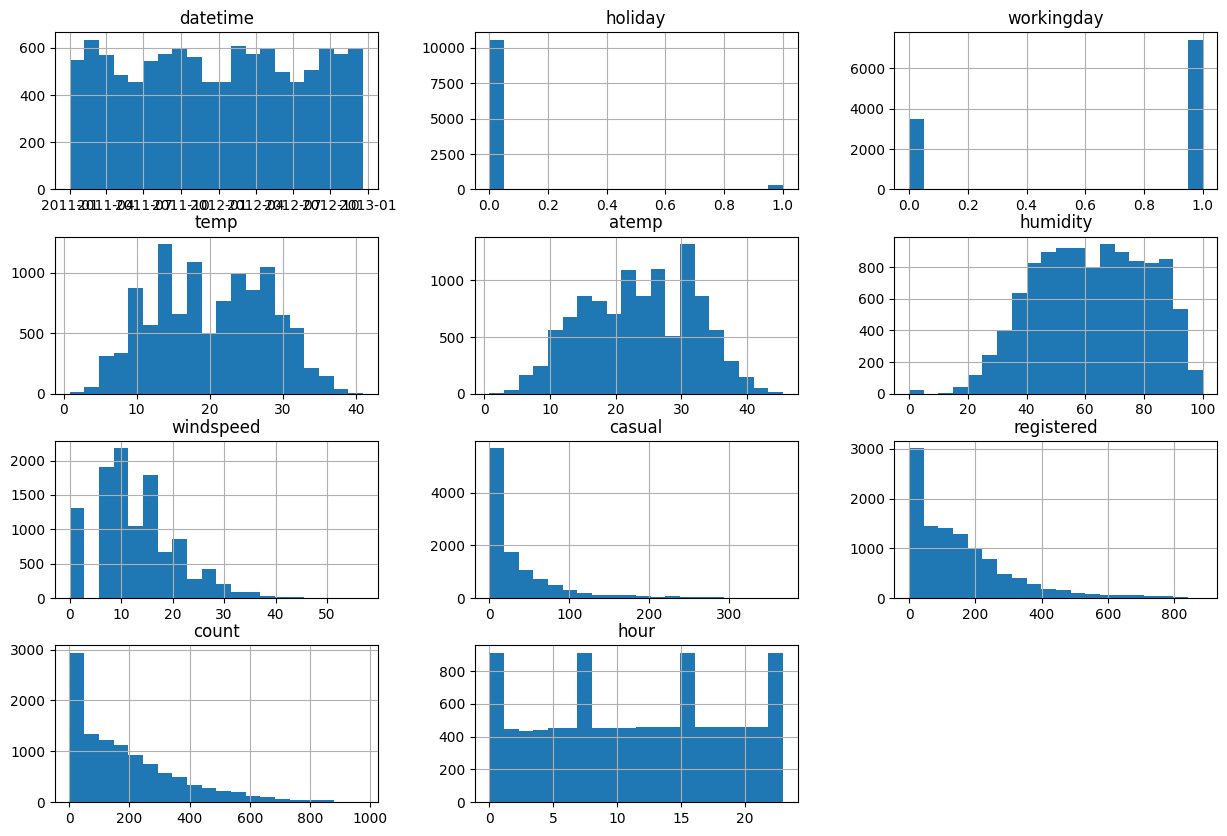

In [49]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt
train.hist(bins=20, figsize=(15, 10))
plt.show()


In [50]:
# create a new feature
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [51]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")


In [52]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


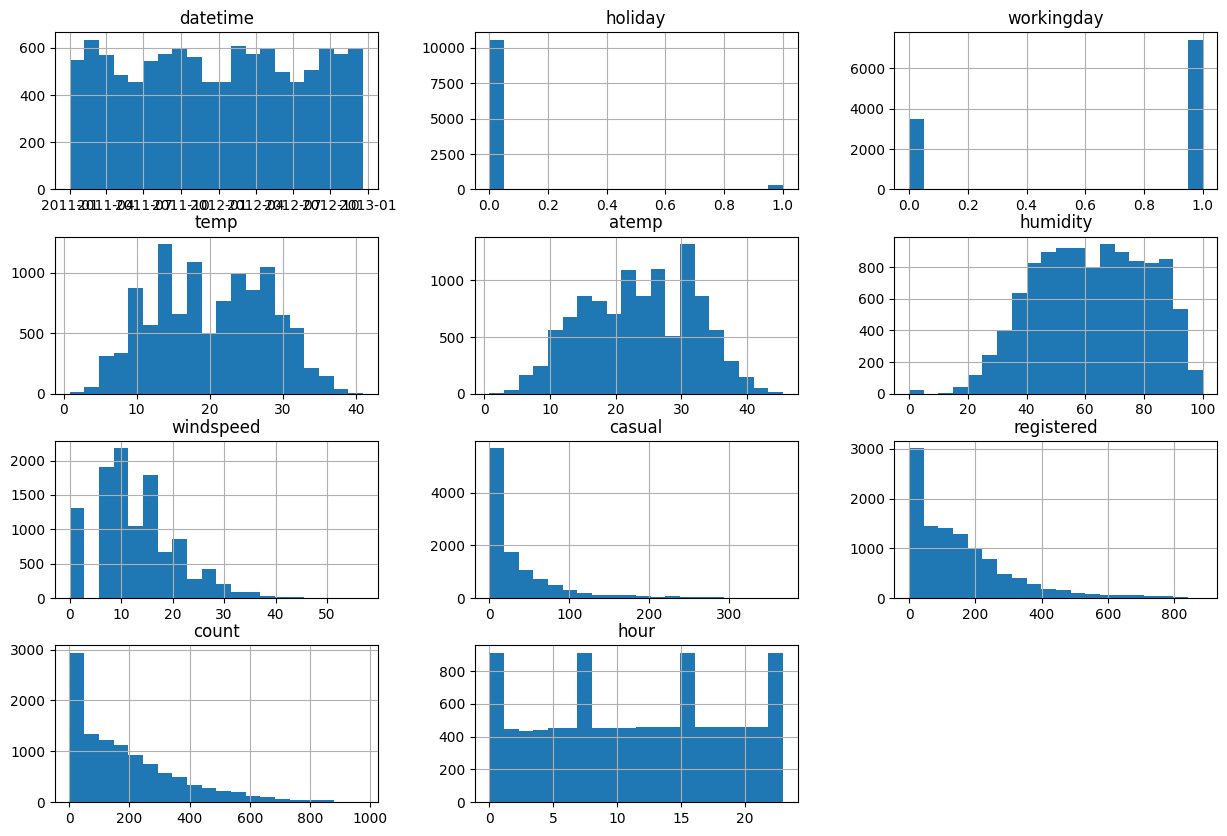

In [53]:
# View histogram of all features again now with the hour feature
train.hist(bins=20, figsize=(15, 10))
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [54]:
from autogluon.tabular import TabularPredictor

label = 'count'

time_limit = 600

metric = 'root_mean_squared_error'

preset = 'best_quality'

train_filtered = train.drop(columns=['casual', 'registered'])

predictor_new_features = TabularPredictor(label=label, eval_metric='root_mean_squared_error')
predictor_new_features.fit(train_data=train, time_limit=time_limit, presets=preset)


No path specified. Models will be saved in: "AutogluonModels/ag-20240427_094738"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240427_094738/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 191 seconds

In [55]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3   -2.363317  root_mean_squared_error      78.334251  403.026876                0.001232           0.050595            3       True          9
1     WeightedEnsemble_L2   -2.385081  root_mean_squared_error      56.948776  237.389322                0.000839           0.026665            2       True          7
2  RandomForestMSE_BAG_L1   -2.830180  root_mean_squared_error       0.568078   19.701001                0.568078          19.701001            1       True          5
3         LightGBM_BAG_L1   -3.144218  root_mean_squared_error       7.975533   54.324527                7.975533          54.324527            1       True          4
4       LightGBMXT_BAG_L2   -4.295452  root_mean_squared_error      78.333019  402.976281         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -4.579351531927511,
  'LightGBM_BAG_L1': -3.1442176611856314,
  'RandomForestMSE_BAG_L1': -2.830180073667178,
  'CatBoost_BAG_L1': -6.838727510269788,
  'WeightedEnsemble_L2': -2.385081219708329,
  'LightGBMXT_BAG_L2': -4.2954515356608765,
  'WeightedEnsemble_L3': -2.363316633414153},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeighb

In [56]:
predictions = predictor_new_features.predict(test)


In [60]:
# Remember to set all negative values to zero
negative_values = (predictions < 0).sum()
print("Number of negative values:", negative_values)

#predictions = predictions.clip(lower=0)

predictions_new_features = predictions.clip(lower=0)


Number of negative values: 0


In [61]:
# Same submitting predictions
submission_new_features = pd.DataFrame({'datetime': test['datetime'], 'count': predictions_new_features})
submission_new_features.to_csv("submission_new_features.csv", index=False)


In [62]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 189k/189k [00:00<00:00, 507kB/s]  
Successfully submitted to Bike Sharing Demand

In [63]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2024-04-27 10:09:32  new features          complete  3.89214      3.89214       
submission.csv               2024-04-27 07:46:41  first raw submission  complete  1.80457      1.80457       
submission.csv               2024-04-27 07:45:11  first raw submission  error                                


#### New Score of 3.89214

<Axes: ylabel='model'>

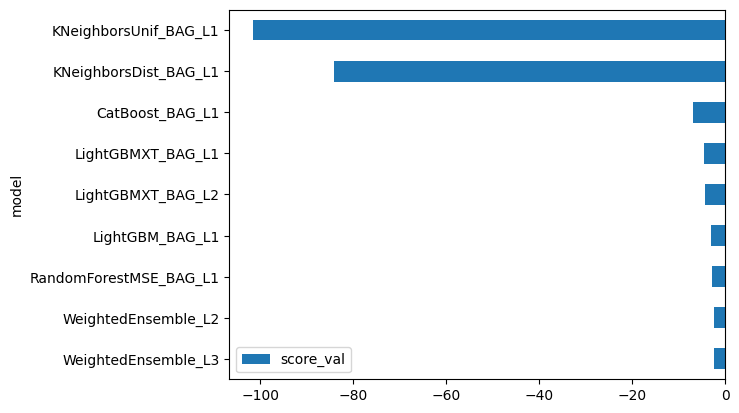

In [83]:
predictor_new_features.leaderboard(silent = True).plot(kind = 'barh',x = 'model',y = 'score_val')


In [84]:
predictor_new_features.get_model_names()

<ipython-input-84-4a0530514fec>:1: DeprecationWarning: `get_model_names` has been deprecated and will be removed in version 1.2. Please use `model_names` instead. This will raise an error in the future!
  predictor_new_features.get_model_names()


['KNeighborsUnif_BAG_L1',
 'KNeighborsDist_BAG_L1',
 'LightGBMXT_BAG_L1',
 'LightGBM_BAG_L1',
 'RandomForestMSE_BAG_L1',
 'CatBoost_BAG_L1',
 'WeightedEnsemble_L2',
 'LightGBMXT_BAG_L2',
 'WeightedEnsemble_L3']

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [69]:
from autogluon.tabular import TabularPredictor

# Define label column
label = 'count'

# Time limit for training in seconds
time_limit = 600

# Preset to use for training
preset = 'best_quality'

# Filter out columns 'casual' and 'registered' from the training dataset
train_filtered = train.drop(columns=['casual', 'registered'])

# Initialize TabularPredictor without specifying hyperparameters
predictor_new_hpo = TabularPredictor(label=label, eval_metric='root_mean_squared_error',
                                     learner_kwargs={'ignored_columns': ['casual', 'registered']})

# Fit the model without hyperparameter optimization
predictor_new_hpo.fit(train_data=train_filtered, time_limit=time_limit, presets=preset)

#

No path specified. Models will be saved in: "AutogluonModels/ag-20240427_102316"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240427_102316/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 175 seconds

In [70]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.362049  root_mean_squared_error      33.231327  396.098991                0.000958           0.032634            3       True         11
1          LightGBM_BAG_L2  -30.568521  root_mean_squared_error      31.034345  302.568445                0.491405          34.625837            2       True          9
2        LightGBMXT_BAG_L2  -31.186989  root_mean_squared_error      32.052622  315.459404                1.509683          47.516796            2       True          8
3   RandomForestMSE_BAG_L2  -31.885002  root_mean_squared_error      31.229281  313.923723                0.686342          45.981115            2       True         10
4      WeightedEnsemble_L2  -32.356592  root_mean_squared_error      30.477041  267.934729   

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.457273921492806,
  'LightGBM_BAG_L1': -33.919639163586254,
  'RandomForestMSE_BAG_L1': -38.4543378929385,
  'CatBoost_BAG_L1': -36.55122959743161,
  'WeightedEnsemble_L2': -32.35659249644735,
  'LightGBMXT_BAG_L2': -31.186989285463934,
  'LightGBM_BAG_L2': -30.568521

In [71]:
predictions_new_hpo = predictor_new_hpo.predict(test)



In [72]:
# Remember to set all negative values to zero
# Set negative predictions to zero
predictions_new_hpo = predictions_new_hpo.clip(lower=0)

# Create a submission dataframe and save it to a CSV file
submission_new_hpo = pd.DataFrame({'datetime': test['datetime'], 'count': predictions_new_hpo})
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)


In [74]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 490kB/s]  
Successfully submitted to Bike Sharing Demand

In [75]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-04-27 11:12:47  new features with hyperparameters  complete  0.61338      0.61338       
submission_new_features.csv  2024-04-27 10:09:32  new features                       complete  3.89214      3.89214       
submission.csv               2024-04-27 07:46:41  first raw submission               complete  1.80457      1.80457       


#### New Score of 0.61338

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

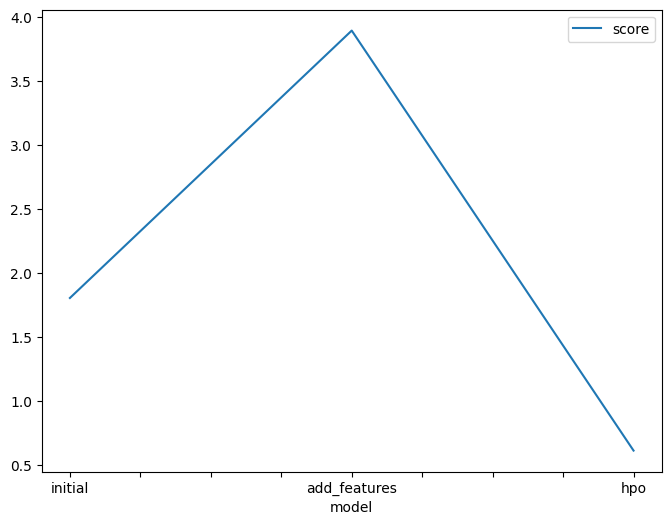

In [77]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [1.80457, 3.89214, 0.61338]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

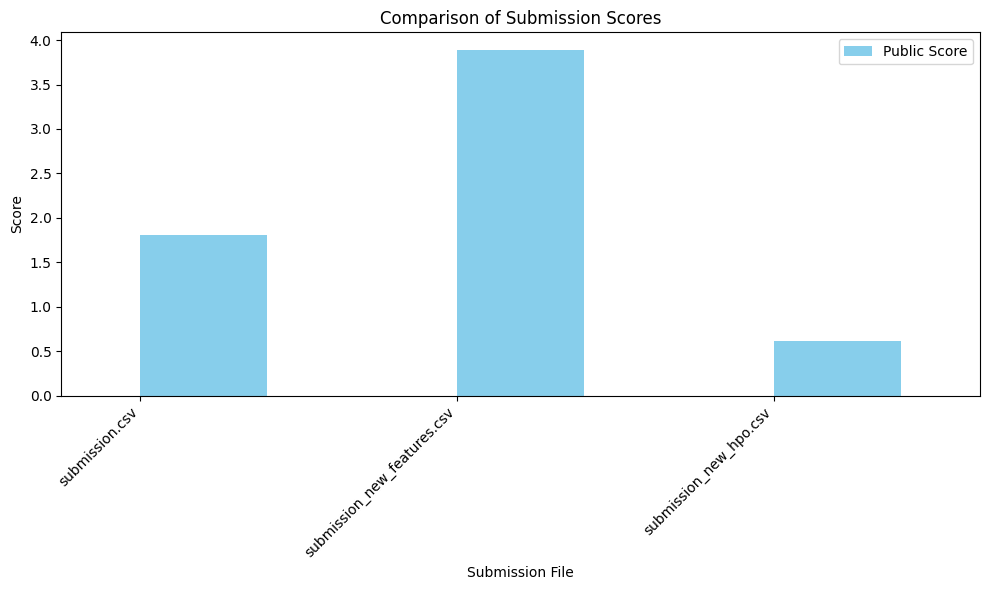

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "fileName": ["submission.csv", "submission_new_features.csv", "submission_new_hpo.csv"],
    "publicScore": [1.80457, 3.89214, 0.61338],
}

df_submissions = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6))

df_submissions.plot(kind='bar', x='fileName', y='publicScore', color='skyblue', ax=ax, width=0.4, position=0, label='Public Score')

plt.xlabel('Submission File')
plt.ylabel('Score')
plt.title('Comparison of Submission Scores')
plt.xticks(rotation=45, ha='right')

plt.legend()

plt.tight_layout()
plt.show()


<Axes: ylabel='model'>

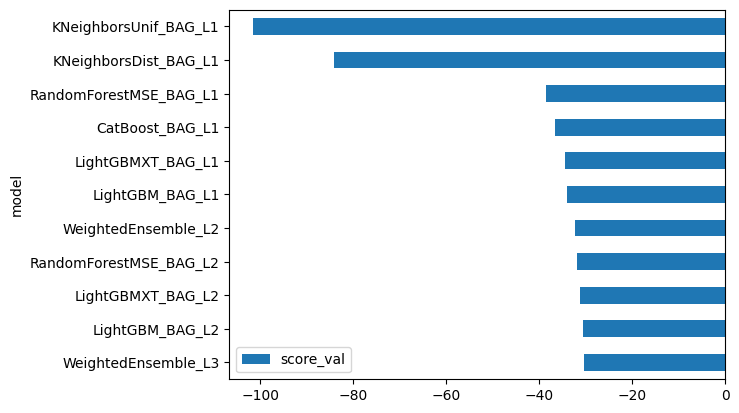

In [85]:
predictor_new_hpo.leaderboard(silent = True).plot(kind = 'barh',x = 'model',y = 'score_val')

In [86]:
predictor_new_hpo.get_model_names()

<ipython-input-86-f2b69ee21258>:1: DeprecationWarning: `get_model_names` has been deprecated and will be removed in version 1.2. Please use `model_names` instead. This will raise an error in the future!
  predictor_new_hpo.get_model_names()


['KNeighborsUnif_BAG_L1',
 'KNeighborsDist_BAG_L1',
 'LightGBMXT_BAG_L1',
 'LightGBM_BAG_L1',
 'RandomForestMSE_BAG_L1',
 'CatBoost_BAG_L1',
 'WeightedEnsemble_L2',
 'LightGBMXT_BAG_L2',
 'LightGBM_BAG_L2',
 'RandomForestMSE_BAG_L2',
 'WeightedEnsemble_L3']

In [98]:
# Get the DataFrame object from predictor_new_hpo.leaderboard()
df = predictor_new_hpo.leaderboard()

# Get a list of column names
columns = df.columns

# Extract the model names from the column names
model_names = [column.split('_')[0] for column in columns]

# Print the model names
print(model_names)

['model', 'score', 'eval', 'pred', 'fit', 'pred', 'fit', 'stack', 'can', 'fit']


### Hyperparameter table

In [104]:
# Get the hyperparameters for each model
hyperparameters = predictor_new_hpo.leaderboard()

# Display the hyperparameters
for model_name, params in hyperparameters.items():
    print(f"Model: {model_name}")
    for key, value in params.items():
        print(f"{key}: {value}")
    print()

Model: model
0: WeightedEnsemble_L3
1: LightGBM_BAG_L2
2: LightGBMXT_BAG_L2
3: RandomForestMSE_BAG_L2
4: WeightedEnsemble_L2
5: LightGBM_BAG_L1
6: LightGBMXT_BAG_L1
7: CatBoost_BAG_L1
8: RandomForestMSE_BAG_L1
9: KNeighborsDist_BAG_L1
10: KNeighborsUnif_BAG_L1

Model: score_val
0: -30.36204857461247
1: -30.568521133898617
2: -31.186989285463934
3: -31.885002479682647
4: -32.35659249644735
5: -33.919639163586254
6: -34.457273921492806
7: -36.55122959743161
8: -38.4543378929385
9: -84.12506123181602
10: -101.54619908446061

Model: eval_metric
0: root_mean_squared_error
1: root_mean_squared_error
2: root_mean_squared_error
3: root_mean_squared_error
4: root_mean_squared_error
5: root_mean_squared_error
6: root_mean_squared_error
7: root_mean_squared_error
8: root_mean_squared_error
9: root_mean_squared_error
10: root_mean_squared_error

Model: pred_time_val
0: 33.231327295303345
1: 31.03434467315674
2: 32.05262207984924
3: 31.229281187057495
4: 30.477041006088257
5: 5.7948760986328125
6: 

In [114]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [396.09899067878723, 302.5684452056885, 315.4594042301178],
    "hpo2": [33.231327295303345, 31.03434467315674, 32.05262207984924],
    "hpo3": [0.03263449668884277, 34.62583732604980, 47.516796350479126],
    "score": [-30.36204857461247, -30.568521133898617, -31.186989285463934]
})

,model,hpo1,hpo2,hpo3,score
0,initial,396.098991,33.231327,0.032634,-30.362049
1,add_features,302.568445,31.034345,34.625837,-30.568521
2,hpo,315.459404,32.052622,47.516796,-31.186989


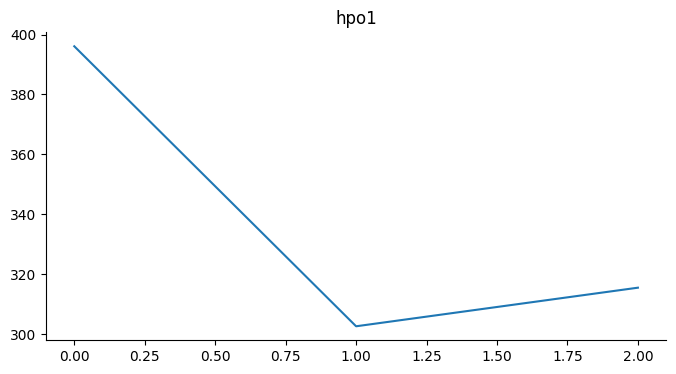

In [115]:
from matplotlib import pyplot as plt
_df_12['hpo1'].plot(kind='line', figsize=(8, 4), title='hpo1')
plt.gca().spines[['top', 'right']].set_visible(False)

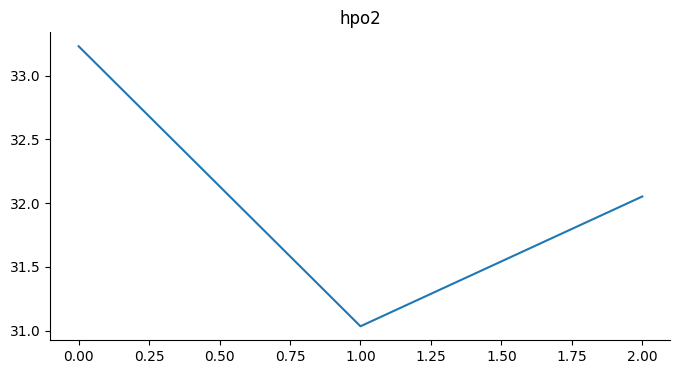

In [116]:
from matplotlib import pyplot as plt
_df_13['hpo2'].plot(kind='line', figsize=(8, 4), title='hpo2')
plt.gca().spines[['top', 'right']].set_visible(False)

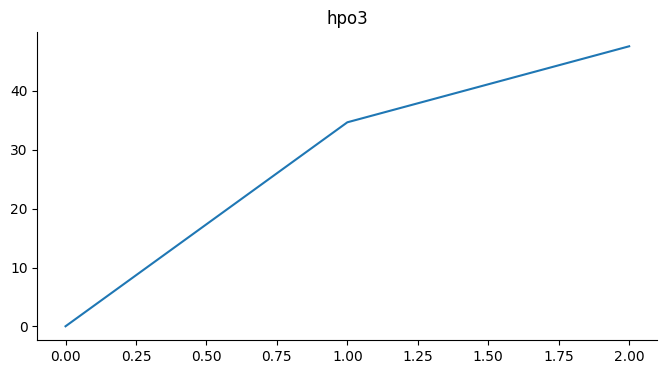

In [117]:
from matplotlib import pyplot as plt
_df_14['hpo3'].plot(kind='line', figsize=(8, 4), title='hpo3')
plt.gca().spines[['top', 'right']].set_visible(False)

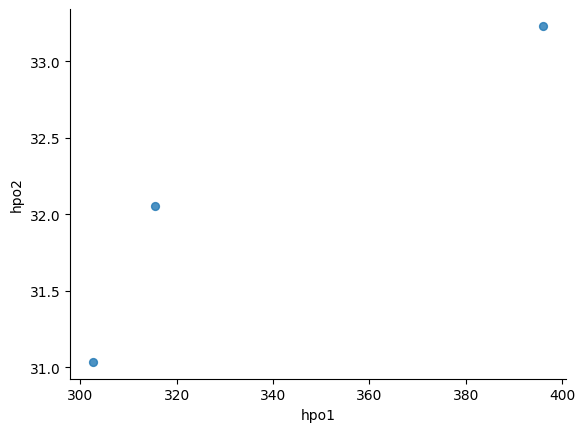

In [118]:
from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='hpo1', y='hpo2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)